In [3]:
# Step 1:  Force repo root as working directory (run this FIRST)
import os
from pathlib import Path

REPO_ROOT = Path.home() / "Desktop" / "main"
os.chdir(REPO_ROOT)

print("Working directory set to repo root:", os.getcwd())
print("Current path exists:", REPO_ROOT.exists())

Working directory set to repo root: /Users/blackeagle25/Desktop/main
Current path exists: True


In [7]:
# Step 2: Load EDA Libraries, Style Setup & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scripts.report import generate_report

# Set plot style (fixed for modern Matplotlib)
plt.style.use('seaborn-v0_8')  # ← this is the correct replacement
sns.set_palette("husl")
%matplotlib inline

print("EDA libraries loaded — ready for charts, graphs, and plots!")

# Load your CSVs
macos_df = pd.read_csv("data/brave_macos_cookies.csv")
ios_df = pd.read_csv("data/brave_ios_emulated_cookies.csv")

print("macOS CSV shape:", macos_df.shape)
print("iOS CSV shape:", ios_df.shape)

EDA libraries loaded — ready for charts, graphs, and plots!
macOS CSV shape: (206, 9)
iOS CSV shape: (690, 8)


In [8]:
# Step 3: Load CSVs using absolute paths to give a high-level summary of the csv table columns/features
macos_path = REPO_ROOT / "data" / "brave_macos_cookies.csv"
ios_path   = REPO_ROOT / "data" / "brave_ios_emulated_cookies.csv"

macos_df = pd.read_csv(macos_path)
ios_df   = pd.read_csv(ios_path)

print("macOS shape:", macos_df.shape)
print("iOS shape:", ios_df.shape)
print("\nmacOS columns:", macos_df.columns.tolist())
print("iOS columns:", ios_df.columns.tolist())

macOS shape: (206, 9)
iOS shape: (690, 8)

macOS columns: ['domain', 'name', 'path', 'expires_utc', 'is_secure', 'is_httponly', 'creation_utc', 'expires_date', 'creation_date']
iOS columns: ['domain', 'name', 'value', 'path', 'expires', 'secure', 'httpOnly', 'platform']


In [9]:
# Combine & basic info
combined = pd.concat([
    macos_df.assign(platform='macOS'),
    ios_df.assign(platform='iOS')
], ignore_index=True)

print("Combined shape:", combined.shape)
print("Platforms:", combined['platform'].value_counts())

Combined shape: (896, 14)
Platforms: platform
iOS      690
macOS    206
Name: count, dtype: int64


1. TOP TEN DOMAINS (Bar Chart) 

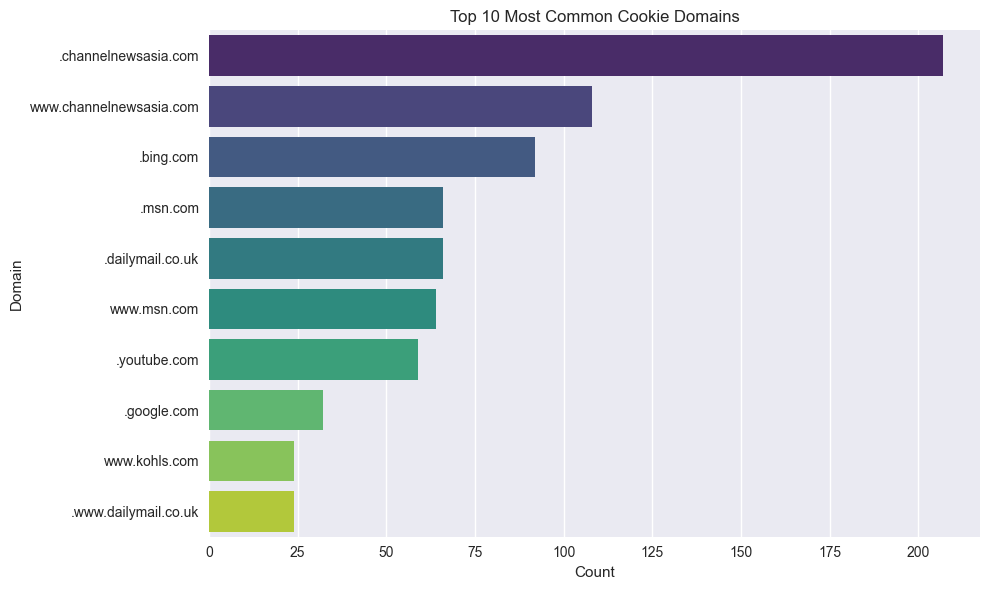

In [10]:
# Horizontal bar chart displaying the top ten most recurrent cookie domains 
top_domains = combined['domain'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_domains.values,
    y=top_domains.index,
    hue=top_domains.index,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Most Common Cookie Domains')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

2. COOKIE EXPIRATION DISTRIBUTION (HISTOGRAM)

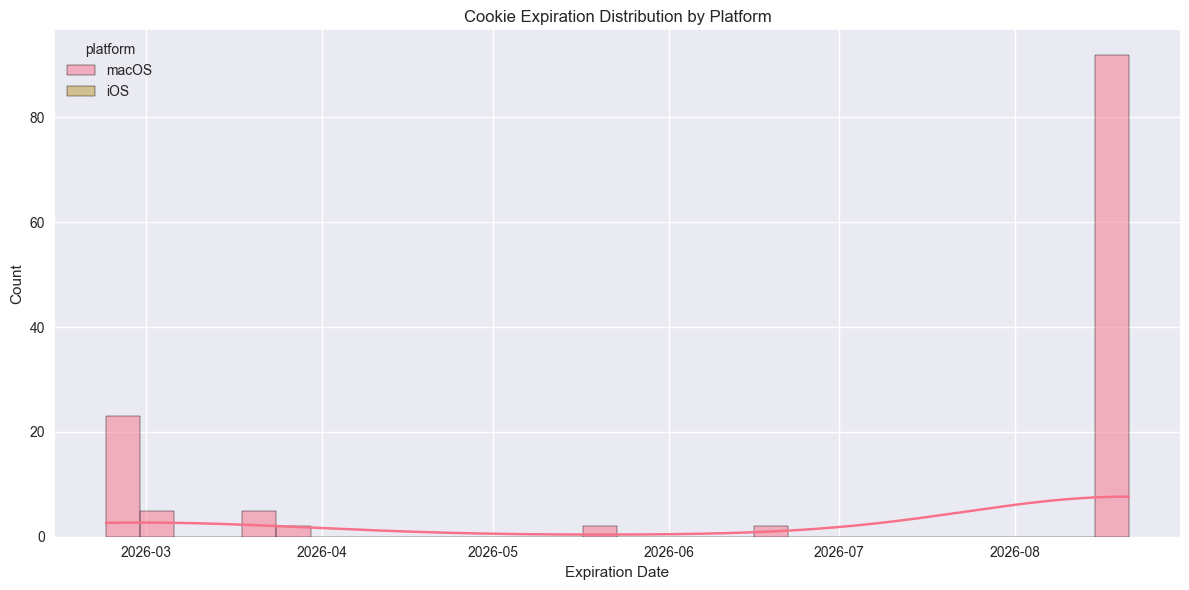

In [15]:
# Chart displaying the metadata (lifespan/expiry) of cookies
# Converts expires_utc to datetime (adjust column name if different)
combined['expires_date'] = pd.to_datetime(combined['expires_date'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(data=combined, x='expires_date', hue='platform', bins=30, kde=True)
plt.title('Cookie Expiration Distribution by Platform')
plt.xlabel('Expiration Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

3. BASIC CLUSTERING EXAMPLE (Optional, but highly recommended to provide a high-level overview of the most prevalent domains)

In [14]:
# Simple example: cluster domains by cookie count per platform
domain_counts = combined.groupby(['domain', 'platform']).size().unstack(fill_value=0)

# Scale data
scaler = StandardScaler()
scaled = scaler.fit_transform(domain_counts)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
domain_counts['cluster'] = kmeans.fit_predict(scaled)

print("Domain clusters:")
print(domain_counts.sort_values('cluster'))

Domain clusters:
platform                 iOS  macOS  cluster
domain                                      
.amazon.com                0      6        0
www2.bing.com              0      1        0
.x.com                     8      7        0
.yahoo.com                 1      6        0
accounts.x.ai              0      1        0
api.x.com                  0      1        0
assets.msn.com             4      9        0
bing.com                   0      1        0
copilot.microsoft.com      0     10        0
fore.coffee                0      2        0
grok.com                   0      1        0
shopping.yahoo.com         0      1        0
templates.cds.yahoo.com    0      1        0
upload.x.com               0      1        0
www.amazon.com             0      5        0
www.amazon.sg              0      2        0
www.bing.com               8      3        0
www.dailymail.co.uk        6      0        0
www.tiktok.com             2      0        0
www.yahoo.com              0      2   